### Imports

In [1]:
import math
import matplotlib.pyplot as plt
import time
from statistics import mean
from sympy import sqrt
from IPython.display import display, Math
from collections import defaultdict

In [2]:
statistics = defaultdict(lambda: [])

### Methods

In [3]:
def isPrimeSqrt(num):
    for i in range(2,int(math.sqrt(num))-1):
        if num % i == 0:
            return False
    return True

def isPrime(num):
    for i in range(2,num):
        if num % i == 0:
            return False
    return True

# Main

## Definitions

In [4]:
methods = [isPrime,isPrimeSqrt]
dont_update = []
prime_number_amount = 19
MAX_SECONDS = 300



prime_numbers = [
        11,
        101,
        1009,
        10007,
        100003,
        1000003,
        10000019,
        100000007,
        1000000007,
        10000000019,
        100000000003,
        1000000000039,
        10000000000037,
        100000000000031,
        1000000000000037,
        10000000000000061,
        100000000000000003,
        1000000000000000003,
        10000000000000000051,
        100000000000000000039,
        1000000000000000000117,
        10000000000000000000009,
        100000000000000000000117,
        1000000000000000000000007,
        10000000000000000000000013,
        100000000000000000000000067,
        1000000000000000000000000103,
        10000000000000000000000000331,
        100000000000000000000000000319]





## Processing

In [5]:
update = list(set(methods)-set(dont_update))

print(update)

for method in update:
  if method.__name__ in statistics:
    del statistics[method.__name__]
start_time = time.time()
global_time = time.time()



for prime_func in update:
  print(prime_func.__name__)
  statistics[prime_func.__name__].append([])
  for i,number in enumerate(prime_numbers[:prime_number_amount]):
    start_time = time.time()
    prime_func(number)
    t = round(time.time()-start_time,10)
    statistics[prime_func.__name__][0].append(t)

    print(f"[{i}] {number}: {t: .2f}s")

    if t > MAX_SECONDS:
      break

  times = statistics[prime_func.__name__][0]
  statistics[prime_func.__name__].append([])
  for i in range(len(times)-1):
    if times[i+1] > 0 and times[i] > 0:
      statistics[prime_func.__name__][1].append(times[i+1]/times[i])


f"execution time: {round(time.time()-global_time,2)}s"
  

[<function isPrimeSqrt at 0x0000024AAE343BA0>, <function isPrime at 0x0000024AAE3439C0>]
isPrimeSqrt
[0] 11:  0.00s
[1] 101:  0.00s
[2] 1009:  0.00s
[3] 10007:  0.00s
[4] 100003:  0.00s
[5] 1000003:  0.00s
[6] 10000019:  0.00s
[7] 100000007:  0.00s
[8] 1000000007:  0.00s
[9] 10000000019:  0.01s
[10] 100000000003:  0.02s
[11] 1000000000039:  0.06s
[12] 10000000000037:  0.18s
[13] 100000000000031:  0.58s
[14] 1000000000000037:  1.81s
[15] 10000000000000061:  5.78s
[16] 100000000000000003:  18.12s
[17] 1000000000000000003:  58.19s
[18] 10000000000000000051:  546.99s
isPrime
[0] 11:  0.00s
[1] 101:  0.00s
[2] 1009:  0.00s
[3] 10007:  0.00s
[4] 100003:  0.01s
[5] 1000003:  0.05s
[6] 10000019:  0.53s
[7] 100000007:  5.15s
[8] 1000000007:  54.45s
[9] 10000000019:  1730.70s


'execution time: 2422.62s'

In [8]:
for key, sublists in statistics.items():
    print(f'{key}:')
    for sublist in sublists:
        print(sublist)

isPrimeSqrt:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010006428, 0.0010008812, 0.006005764, 0.0180163383, 0.062056303, 0.1791627407, 0.5775256157, 1.8071789742, 5.7803480625, 18.118298769, 58.1910376549, 546.9903864861]
[1.0002382468549216, 6.000476380213756, 2.9998412025514156, 3.444445922732257, 2.8870998116017317, 3.2234694191636692, 3.1291754427369893, 3.1985476507985813, 3.1344650137147343, 3.2117274583452367, 9.39990776122619]
isPrime:
[0.0, 0.0, 0.0, 0.0010006428, 0.0050046444, 0.0510463715, 0.5284891129, 5.1532075405, 54.4520711899, 1730.7007946968]
[5.00142948112953, 10.19979990985973, 10.353118103605071, 9.750830082804532, 10.566636558289419, 31.783929552670855]


## Visualization

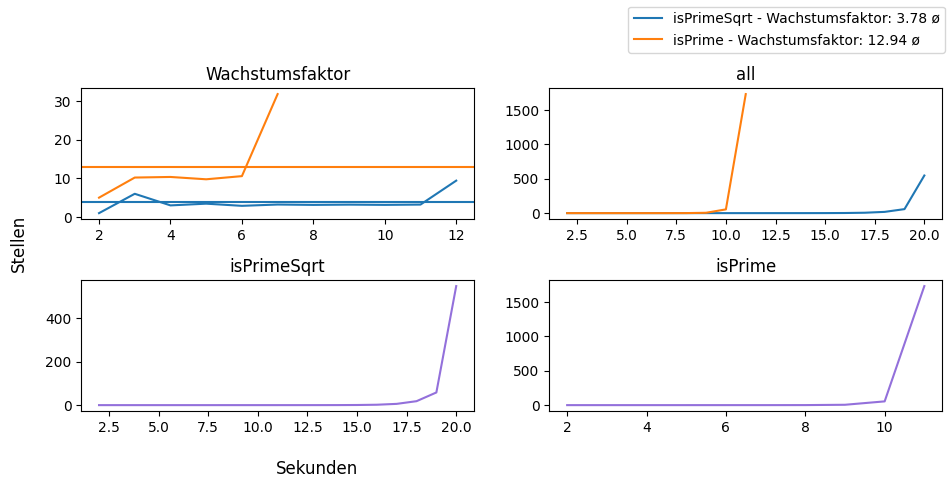

<IPython.core.display.Math object>

In [19]:
fig,a = plt.subplots(2,max(len(methods),2))


for method_name, values in statistics.items():

    x_values = [2+ i for i in range(len(values[0]))]


    a[0][1].plot(x_values,values[0])
    lines = a[0][0].plot(x_values[:len(values[1])],values[1])

    fac = mean(values[1])
    a[0][0].axhline(fac,color=lines[0].get_color(),label=f"{method_name} - Wachstumsfaktor: {round(fac, 2)} \u00F8")

    i = list(statistics.keys()).index(method_name)
    a[1][i].plot(x_values,values[0], color="mediumpurple")
    a[1][i].set_title(method_name)



a[0][1].set_title(f"all")


a[0][0].set_title(f"Wachstumsfaktor")


fig.supxlabel('Stellen')
fig.supylabel('Sekunden')
fig.tight_layout(rect=[0, 0, 1.5, 0.9])
fig.legend()


plt.show()

print()
display(Math(r'\sqrt{10} = ' + f'{sqrt(10).evalf():.4f}'))
